1. Import libraries & final dataset.  
2. Create a line plot of the temperatures for 2022 using pandas’ plotting function.  
3. Create a column with the count of trips per day and merge it with the weather dataframe.  
4. Create dual-axis line chart for daily trips and temperature.  
5. Bonus task - part 1.  
6. Bonus task - part 2.

In [3]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# Project root
PROJECT_ROOT = Path.cwd().parent
print("PROJECT_ROOT:", PROJECT_ROOT)

data_path = PROJECT_ROOT / "data" / "processed" / "citibike_2022_with_weather.csv"
print("DATA PATH:", data_path)
print("Exists?", data_path.exists())

PROJECT_ROOT: /Users/samantha.lisik/Documents/citibike
DATA PATH: /Users/samantha.lisik/Documents/citibike/data/processed/citibike_2022_with_weather.csv
Exists? True


In [4]:
# Read the dataframe
df = pd.read_csv(data_path, parse_dates=["started_at"])
df.head()

/var/folders/s0/tyllrxjd18l9z7g_0x8hn4x80000gp/T/ipykernel_43786/2256375050.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, parse_dates=["started_at"])


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp_C,_merge
0,0CC1D7F53FA21F9A,electric_bike,2022-11-02 05:54:11.481,2022-11-02 06:08:27.471,Park Ave & E 162 St,8016.07,Jerome Ave & W 193 St,8619.02,40.825701,-73.915644,40.866590,-73.897940,casual,2022-11-02,17.6,both
1,EDAECDAE6BF903DE,classic_bike,2022-11-02 18:20:15.611,2022-11-02 19:00:24.787,Broadway & W 61 St,7014.12,Leonard St & Church St,5359.11,40.770030,-73.981968,40.717571,-74.005549,casual,2022-11-02,17.6,both
2,37C06FED49069B80,electric_bike,2022-11-04 18:39:39.873,2022-11-04 18:44:01.851,W 54 St & 11 Ave,6955.05,11 Ave & W 59 St,7059.01,40.768333,-73.992573,40.771497,-73.990460,member,2022-11-04,15.2,both
3,63751973E9A95FB1,classic_bike,2022-11-09 18:02:29.616,2022-11-09 18:19:28.693,Broadway & W 41 St,6560.01,11 Ave & W 59 St,7059.01,40.755136,-73.986580,40.771497,-73.990460,member,2022-11-09,8.7,both
4,F7410DEDF925FBA8,electric_bike,2022-11-12 10:23:11.805,2022-11-12 10:28:24.794,William St & Pine St,5065.12,Leonard St & Church St,5359.11,40.707317,-74.008854,40.717571,-74.005549,member,2022-11-12,19.7,both


2. Create a line plot of the temperatures for 2022 using pandas’ plotting function.

In [6]:
# Filter to only 2022 data
df_2022 = df[df["date"].astype(str).str.startswith("2022")].copy()

df_2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp_C,_merge
0,0CC1D7F53FA21F9A,electric_bike,2022-11-02 05:54:11.481,2022-11-02 06:08:27.471,Park Ave & E 162 St,8016.07,Jerome Ave & W 193 St,8619.02,40.825701,-73.915644,40.866590,-73.897940,casual,2022-11-02,17.6,both
1,EDAECDAE6BF903DE,classic_bike,2022-11-02 18:20:15.611,2022-11-02 19:00:24.787,Broadway & W 61 St,7014.12,Leonard St & Church St,5359.11,40.770030,-73.981968,40.717571,-74.005549,casual,2022-11-02,17.6,both
2,37C06FED49069B80,electric_bike,2022-11-04 18:39:39.873,2022-11-04 18:44:01.851,W 54 St & 11 Ave,6955.05,11 Ave & W 59 St,7059.01,40.768333,-73.992573,40.771497,-73.990460,member,2022-11-04,15.2,both
3,63751973E9A95FB1,classic_bike,2022-11-09 18:02:29.616,2022-11-09 18:19:28.693,Broadway & W 41 St,6560.01,11 Ave & W 59 St,7059.01,40.755136,-73.986580,40.771497,-73.990460,member,2022-11-09,8.7,both
4,F7410DEDF925FBA8,electric_bike,2022-11-12 10:23:11.805,2022-11-12 10:28:24.794,William St & Pine St,5065.12,Leonard St & Church St,5359.11,40.707317,-74.008854,40.717571,-74.005549,member,2022-11-12,19.7,both


In [7]:
# Create weather dataframe for 2022 only
df_weather = (
    df_2022[["date", "avgTemp_C"]]
    .drop_duplicates()
    .sort_values("date")
    .set_index("date")
)

df_weather.head()

,avgTemp_C
date,
2022-01-01,11.6
2022-01-02,11.4
2022-01-03,1.4
2022-01-04,-2.7
2022-01-05,3.2


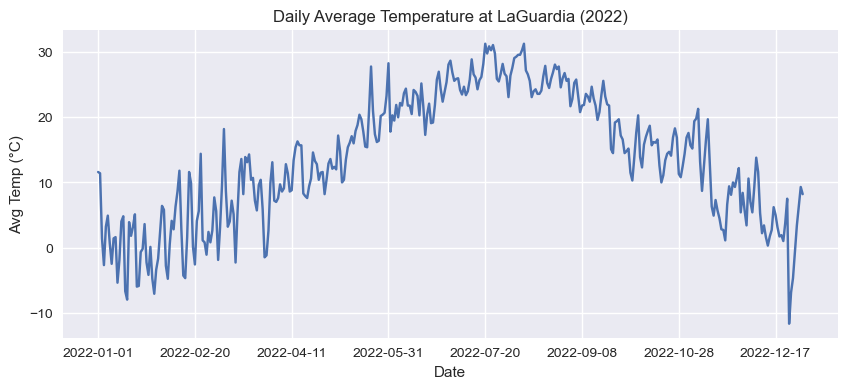

In [8]:
# Create the pandas time-series temperature plot
ax = df_weather["avgTemp_C"].plot(
    figsize=(10, 4),
    title="Daily Average Temperature at LaGuardia (2022)",
    ylabel="Avg Temp (°C)"
)

ax.set_xlabel("Date")
plt.show()

In [9]:
# Save the plot into the "visualizations" folder
from pathlib import Path

fig = ax.get_figure()
save_path = PROJECT_ROOT / "visualizations" / "temperature_timeseries_2022.png"
fig.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

save_path

PosixPath('/Users/samantha.lisik/Documents/citibike/visualizations/temperature_timeseries_2022.png')

3. Create a column with the count of trips per day and merge it with the weather dataframe.

In [10]:
# Count trips per day
df_trips_per_day = (
    df_2022.groupby("date")
    .size()
    .reset_index(name="trips_per_day")
    .sort_values("date")
)

df_trips_per_day.head()

,date,trips_per_day
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [11]:
# Reset the weather dataframe index
df_weather_reset = df_weather.reset_index()
df_weather_reset.head()

,date,avgTemp_C
0,2022-01-01,11.6
1,2022-01-02,11.4
2,2022-01-03,1.4
3,2022-01-04,-2.7
4,2022-01-05,3.2


In [12]:
# Merge daily trips with daily weather on the "date" column
df_daily = (
    df_trips_per_day
    .merge(df_weather_reset, on="date", how="inner")
    .sort_values("date")
)

df_daily.head()

,date,trips_per_day,avgTemp_C
0,2022-01-01,20428,11.6
1,2022-01-02,43009,11.4
2,2022-01-03,33189,1.4
3,2022-01-04,36842,-2.7
4,2022-01-05,34230,3.2


In [13]:
# Set date as the index for time-series plots
df_daily = df_daily.set_index("date")
df_daily.head()

,trips_per_day,avgTemp_C
date,,
2022-01-01,20428,11.6
2022-01-02,43009,11.4
2022-01-03,33189,1.4
2022-01-04,36842,-2.7
2022-01-05,34230,3.2


4. Create dual-axis line chart for daily trips and temperature.

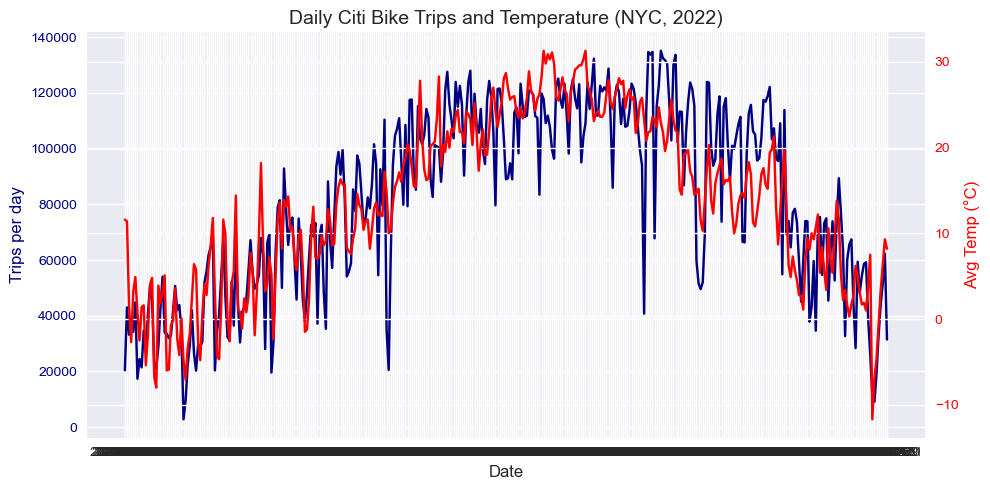

In [14]:
import matplotlib.pyplot as plt

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left y-axis (bike trips)
ax1.plot(
    df_daily.index,
    df_daily["trips_per_day"],
    color="navy",
    label="Trips per day"
)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Trips per day", color="navy", fontsize=12)
ax1.tick_params(axis="y", labelcolor="navy")

# Right y-axis (temperature)
ax2 = ax1.twinx()   # create twin axis
ax2.plot(
    df_daily.index,
    df_daily["avgTemp_C"],
    color="red",
    label="Avg Temp (°C)"
)
ax2.set_ylabel("Avg Temp (°C)", color="red", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

# Title + layout
plt.title("Daily Citi Bike Trips and Temperature (NYC, 2022)", fontsize=14)
fig.tight_layout()

plt.show()

In [15]:
# Save the line chart to the "visualizations" folder
save_path = PROJECT_ROOT / "visualizations" / "dual_axis_trips_vs_temp_2022.png"
fig.savefig(save_path, dpi=300, bbox_inches="tight")

save_path

PosixPath('/Users/samantha.lisik/Documents/citibike/visualizations/dual_axis_trips_vs_temp_2022.png')

# Line chart explanation

I used Matplotlib’s object-oriented approach to create the dual-axis plot. First, I created a figure and an axes object with fig, ax1 = plt.subplots(), then plotted daily bike trips on ax1. Because temperature uses a different scale, I added a second y-axis using ax2 = ax1.twinx() and plotted the temperature line there. The object-oriented approach gives direct control over each axis, which makes dual-axis charts easy to customize.

5. Bonus task - part 1.

In [17]:
# Check dtypes for started_at and ended_at
df[["started_at", "ended_at"]].dtypes

started_at    datetime64[ns]
ended_at              object
dtype: object

In [18]:
# Convert ended_at to datetime
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [22]:
# Check
df[["started_at", "ended_at"]].dtypes

started_at    datetime64[ns]
ended_at      datetime64[ns]
dtype: object

In [20]:
# Create trip duration in minutes
df["tripduration_min"] = (
    df["ended_at"] - df["started_at"]
).dt.total_seconds() / 60

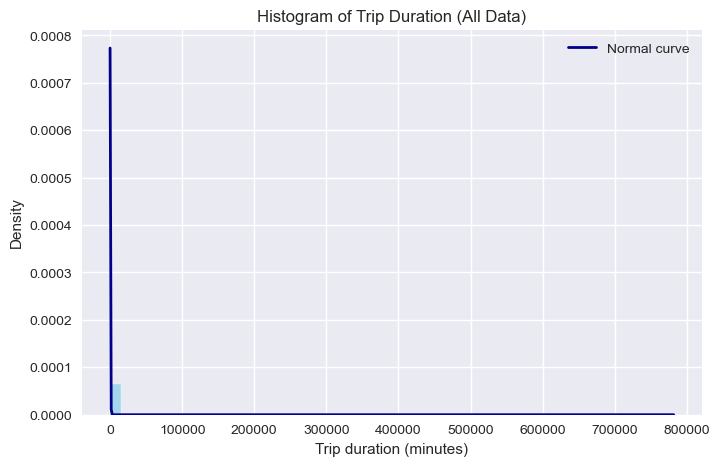

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))

# Plot histogram of all durations
counts, bins, patches = ax.hist(
    df["tripduration_min"],
    bins=50,
    color="skyblue",
    edgecolor="white",
    alpha=0.7,
    density=True              
)

# Fit a normal distribution curve
mu = df["tripduration_min"].mean()
sigma = df["tripduration_min"].std()

x = np.linspace(df["tripduration_min"].min(), df["tripduration_min"].max(), 500)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

ax.plot(x, pdf, color="darkblue", linewidth=2, label="Normal curve")

ax.set_xlabel("Trip duration (minutes)")
ax.set_ylabel("Density")
ax.set_title("Histogram of Trip Duration (All Data)")
ax.legend()

plt.show()

In [24]:
# Limit the x-axis to a reasonable range (e.g., 0–120 minutes)
ax.set_xlim(0, 120)   # show only the first 0–120 minutes

(0.0, 120.0)

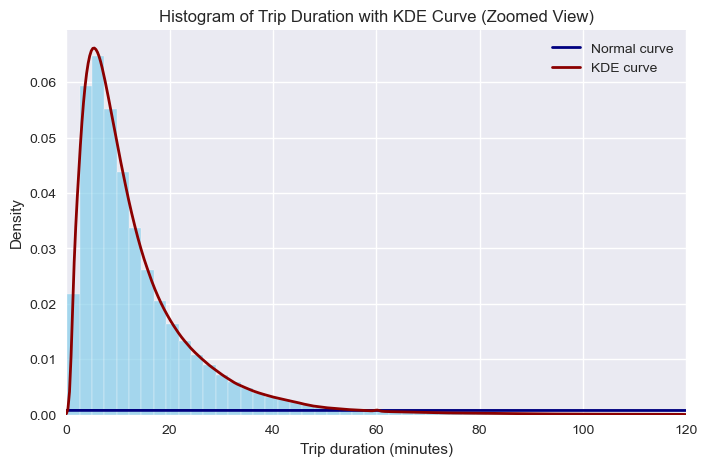

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Ensure figure and axes exist in this cell
fig, ax = plt.subplots(figsize=(8, 5))

# Histogram data already zoomed (0–120 min)
visible_mask = (df["tripduration_min"] >= 0) & (df["tripduration_min"] <= 120)
data_for_hist = df.loc[visible_mask, "tripduration_min"]

# Histogram
counts, bins, patches = ax.hist(
    data_for_hist,
    bins=50,
    density=True,
    alpha=0.7,
    color="skyblue",
    edgecolor="white"
)

# Normal curve
mu = df["tripduration_min"].mean()
sigma = df["tripduration_min"].std()
x = np.linspace(0, 120, 500)
pdf = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mu)/sigma)**2)
ax.plot(x, pdf, color="navy", linewidth=2, label="Normal curve")

# KDE curve
kde = gaussian_kde(data_for_hist)
x_kde = np.linspace(0, 120, 400)
kde_values = kde(x_kde)
ax.plot(x_kde, kde_values, color="darkred", linewidth=2, label="KDE curve")

ax.set_xlim(0, 120)
ax.set_xlabel("Trip duration (minutes)")
ax.set_ylabel("Density")
ax.set_title("Histogram of Trip Duration with KDE Curve (Zoomed View)")
ax.legend()

plt.show()

**Histogram of trip duration with KDE curve - explanation**

To visualize trip durations, I created a histogram of all trip duration values. Because the dataset contains many extreme outliers (trips lasting several days or more due to data errors), I kept all data but restricted the visible x-axis to 0–120 minutes so the distribution could be interpreted clearly.

Next, I added two curves on top of the histogram: a normal curve computed from the full dataset, and a KDE (kernel density estimate) curve, which follows the actual shape of the histogram more closely.

The KDE curve provides a smooth approximation of the underlying distribution and makes the skewed pattern of trip durations easier to see, while still using all available observations.

6. Bonus task - part 2.

In [32]:
# Identify the columns for “usertype” and “gender”
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp_C', '_merge', 'tripduration_min'],
      dtype='object')

The dataset doesn't include a gender column, which is quite common with publicly available Citi Bike data. However, I will still proceed with the pie chart by substituting another categorical variable for gender - 'rideable_type'.

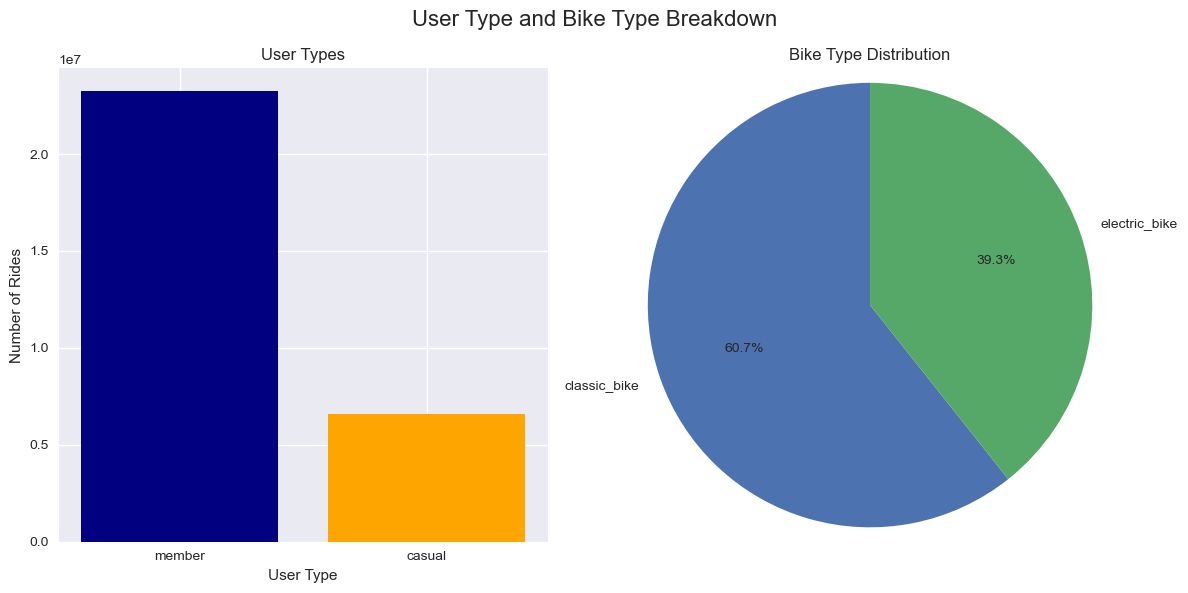

In [33]:
# Create bar chart & pie chart

import matplotlib.pyplot as plt

# Bar chart data (user type)
usertype_counts = df["member_casual"].value_counts()

# Pie chart data (bike type)
bike_type_counts = df["rideable_type"].value_counts()

# Create figure with 2 separate axes (subplots)
fig, (ax1, ax2) = plt.subplots(
    1, 2,        # 1 row, 2 columns
    figsize=(12, 6)
)

# Bar chart for usertype
ax1.bar(
    usertype_counts.index,
    usertype_counts.values,
    color=["navy", "orange"]
)
ax1.set_title("User Types")
ax1.set_xlabel("User Type")
ax1.set_ylabel("Number of Rides")

# Pie chart for rideable type
ax2.pie(
    bike_type_counts.values,
    labels=bike_type_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
ax2.set_title("Bike Type Distribution")
ax2.axis("equal")  # keeps pie circular

# Overall title for the entire figure
fig.suptitle("User Type and Bike Type Breakdown", fontsize=16)

plt.tight_layout()
plt.show()

In [34]:
# Save the figure
save_path = PROJECT_ROOT / "visualizations" / "user_and_bike_type_breakdown.png"
fig.savefig(save_path, dpi=300, bbox_inches="tight")

save_path

PosixPath('/Users/samantha.lisik/Documents/citibike/visualizations/user_and_bike_type_breakdown.png')

Explanation: Bar chart + pie chart using the object-oriented matplotlib approach

To create two different plots within the same figure, I used matplotlib’s object-oriented (OO) interface. Instead of calling plt.plot() directly, I created a figure with two independent axes objects:

fig, (ax1, ax2) = plt.subplots(1, 2)


The first axes (ax1) was used to draw a bar chart of the member_casual variable, showing how many rides were taken by members vs. casual users. The second axes (ax2) was used to draw a pie chart, visualizing the proportion of bike types (rideable_type) in the dataset.

Using the OO approach makes it easy to position multiple plots side by side, customize each subplot independently, and follow matplotlib’s object hierarchy. This is different from a dual axis because each plot has its own separate axes rather than sharing the same x- or y-axis.